In [ ]:
import os
import random
import sys
## Package
import glob
import keras
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
import seaborn as sns
import scipy.io.wavfile
import tensorflow
py.init_notebook_mode(connected=True)


## Keras
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from tensorflow.keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical


## Sklearn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


## Rest
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from tqdm import tqdm

input_duration=3
# % pylab inline

## Reading the Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Data Directory
# Please edit according to your directory change.
dir_list = os.listdir('/content/gdrive/MyDrive/Audio_Speech_Actors_01-24')
dir_list.sort()
print (dir_list)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [ ]:
dir_list

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24']

In [ ]:
data_df = pd.DataFrame(columns=['path', 'source', 'actor', 'gender',
                                'intensity', 'statement', 'repetition', 'emotion'])


file_list = os.listdir('/content/gdrive/MyDrive/Audio_Speech_Actors_01-24/Actor_01')
file_list

['03-01-03-02-01-01-01.wav',
 '03-01-03-02-01-02-01.wav',
 '03-01-02-01-02-02-01.wav',
 '03-01-01-01-02-02-01.wav',
 '03-01-03-01-02-02-01.wav',
 '03-01-02-01-01-01-01.wav',
 '03-01-02-02-01-01-01.wav',
 '03-01-02-02-02-02-01.wav',
 '03-01-02-01-01-02-01.wav',
 '03-01-02-01-02-01-01.wav',
 '03-01-03-01-01-02-01.wav',
 '03-01-04-01-02-01-01.wav',
 '03-01-02-02-02-01-01.wav',
 '03-01-01-01-02-01-01.wav',
 '03-01-04-01-01-01-01.wav',
 '03-01-03-02-02-01-01.wav',
 '03-01-04-01-01-02-01.wav',
 '03-01-02-02-01-02-01.wav',
 '03-01-01-01-01-01-01.wav',
 '03-01-03-01-01-01-01.wav',
 '03-01-01-01-01-02-01.wav',
 '03-01-03-02-02-02-01.wav',
 '03-01-03-01-02-01-01.wav',
 '03-01-05-02-02-02-01.wav',
 '03-01-04-02-01-01-01.wav',
 '03-01-08-02-01-01-01.wav',
 '03-01-07-01-01-02-01.wav',
 '03-01-04-02-02-02-01.wav',
 '03-01-06-01-02-02-01.wav',
 '03-01-05-01-02-02-01.wav',
 '03-01-06-02-01-02-01.wav',
 '03-01-04-01-02-02-01.wav',
 '03-01-06-02-01-01-01.wav',
 '03-01-07-02-02-02-01.wav',
 '03-01-07-01-

In [ ]:
# Create DataFrame for Data intel
data_df = pd.DataFrame(columns=['path', 'source', 'actor', 'gender',
                                'intensity', 'statement', 'repetition', 'emotion'])
count = 0
for i in dir_list:
    file_list = os.listdir('/content/gdrive/MyDrive/Audio_Speech_Actors_01-24/' + i)
    for f in file_list:
        nm = f.split('.')[0].split('-')
        path = '/content/gdrive/MyDrive/Audio_Speech_Actors_01-24/' + i + '/' + f
        src = int(nm[1])
        actor = int(nm[-1])
        emotion = int(nm[2])

        if int(actor)%2 == 0:
            gender = "female"
        else:
            gender = "male"

        if nm[3] == '01':
            intensity = 0
        else:
            intensity = 1

        if nm[4] == '01':
            statement = 0
        else:
            statement = 1

        if nm[5] == '01':
            repeat = 0
        else:
            repeat = 1

        data_df.loc[count] = [path, src, actor, gender, intensity, statement, repeat, emotion]
        count += 1

In [ ]:
print (len(data_df))
data_df.head(25)

1440


,path,source,actor,gender,intensity,statement,repetition,emotion
0,/content/gdrive/MyDrive/Audio_Speech_Actors_01...,1,1,male,1,0,0,3
1,/content/gdrive/MyDrive/Audio_Speech_Actors_01...,1,1,male,1,0,1,3
2,/content/gdrive/MyDrive/Audio_Speech_Actors_01...,1,1,male,0,1,1,2
3,/content/gdrive/MyDrive/Audio_Speech_Actors_01...,1,1,male,0,1,1,1
4,/content/gdrive/MyDrive/Audio_Speech_Actors_01...,1,1,male,0,1,1,3
5,/content/gdrive/MyDrive/Audio_Speech_Actors_01...,1,1,male,0,0,0,2
6,/content/gdrive/MyDrive/Audio_Speech_Actors_01...,1,1,male,1,0,0,2
7,/content/gdrive/MyDrive/Audio_Speech_Actors_01...,1,1,male,1,1,1,2
8,/content/gdrive/MyDrive/Audio_Speech_Actors_01...,1,1,male,0,0,1,2
9,/content/gdrive/MyDrive/Audio_Speech_Actors_01...,1,1,male,0,1,0,2


## Plotting the audio file's waveform and its spectrogram

In [ ]:
filename = data_df.path[1021]
print (filename)

samples, sample_rate = librosa.load(filename)
sample_rate, samples

/content/gdrive/MyDrive/Audio_Speech_Actors_01-24/Actor_18/03-01-01-01-02-01-18.wav


(22050, array([-1.4251865e-10,  1.9504061e-10, -2.5405866e-10, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32))

In [ ]:
len(samples), sample_rate

(76517, 22050)

In [ ]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

In [ ]:
sample_rate/ len(samples)

0.2881712560607447

Text(0.5, 0, 'Seconds')

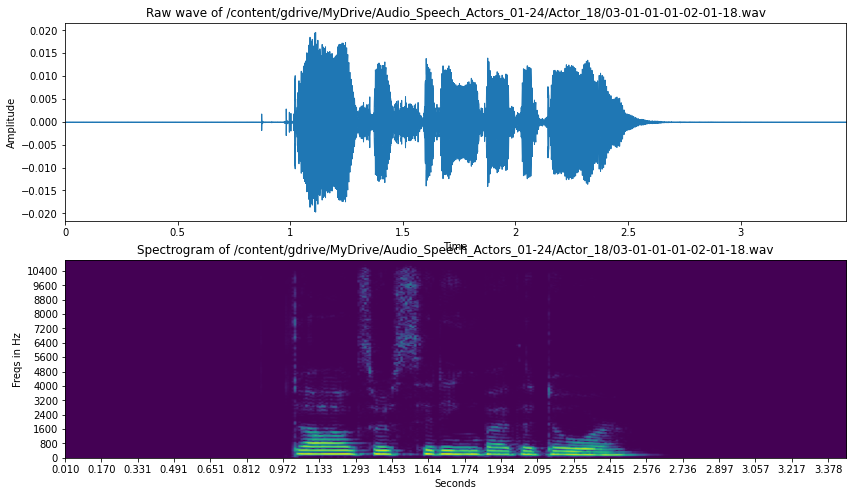

In [ ]:
# Plotting Wave Form and Spectrogram
freqs, times, spectrogram = log_specgram(samples, sample_rate)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
librosa.display.waveplot(samples, sr=sample_rate)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower',
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

In [ ]:
mean = np.mean(spectrogram, axis=0)
std = np.std(spectrogram, axis=0)
spectrogram = (spectrogram - mean) / std

In [ ]:
# Trim the silence voice
aa , bb = librosa.effects.trim(samples, top_db=30)
aa, bb

(array([-6.8972513e-05, -9.6796226e-05, -7.3686737e-05, ...,
        -4.5423047e-05, -3.1724565e-05, -1.9439753e-05], dtype=float32),
 array([21504, 57344]))

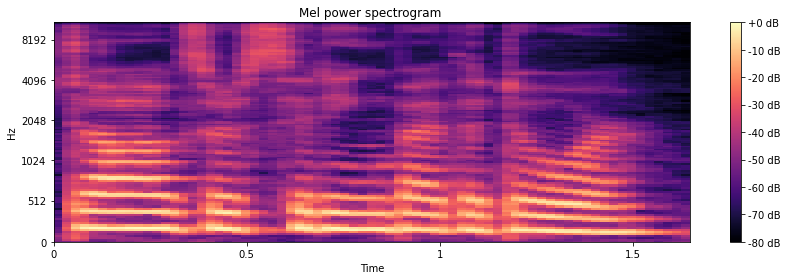

In [ ]:
# Plotting Mel Power Spectrogram
S = librosa.feature.melspectrogram(aa, sr=sample_rate, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

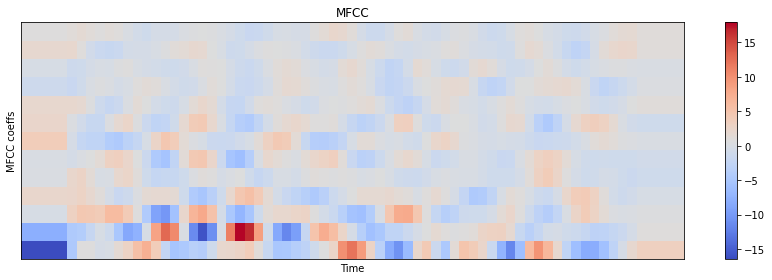

In [ ]:
# Plotting MFCC
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

In [ ]:
# Original Sound
ipd.Audio(samples, rate=sample_rate)

In [ ]:
# Silence trimmed Sound by librosa.effects.trim()
ipd.Audio(aa, rate=sample_rate)

In [ ]:
# Silence trimmed Sound by manual trimming
samples_cut = samples[10000:-12500]
ipd.Audio(samples_cut, rate=sample_rate)

In [ ]:
# All class
label8_list = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 1:
        lb = "_neutral"
    elif data_df.emotion[i] == 2:
        lb = "_neutral"
    elif data_df.emotion[i] == 3:
        lb = "_unstressed"
    elif data_df.emotion[i] == 4:
        lb = "_stressed"
    elif data_df.emotion[i] == 5:
        lb = "_stressed"
    elif data_df.emotion[i] == 6:
        lb = "_stressed"
    elif data_df.emotion[i] == 7:
        lb = "_stressed"
    elif data_df.emotion[i] == 8:
        lb = "_unstressed"
    else:
        lb = "_neutral"

    # Add gender to the label
    label8_list.append(data_df.gender[i]  + lb)

len(label8_list)

1440

In [ ]:
# Select the label set you want by commenting the unwanteds.
data_df['label'] = label8_list
data_df.head()

,path,source,actor,gender,intensity,statement,repetition,emotion,label
0,/content/gdrive/MyDrive/Audio_Speech_Actors_01...,1,1,male,1,0,0,3,male_unstressed
1,/content/gdrive/MyDrive/Audio_Speech_Actors_01...,1,1,male,1,0,1,3,male_unstressed
2,/content/gdrive/MyDrive/Audio_Speech_Actors_01...,1,1,male,0,1,1,2,male_neutral
3,/content/gdrive/MyDrive/Audio_Speech_Actors_01...,1,1,male,0,1,1,1,male_neutral
4,/content/gdrive/MyDrive/Audio_Speech_Actors_01...,1,1,male,0,1,1,3,male_unstressed


In [ ]:
print (data_df.label.value_counts().keys())

Index(['male_stressed', 'female_stressed', 'male_unstressed',
       'female_unstressed', 'male_neutral', 'female_neutral'],
      dtype='object')


In [ ]:
# Plotting the emotion distribution

def plot_emotion_dist(dist, color_code='#C2185B', title="Plot"):
    tmp_df = pd.DataFrame()
    tmp_df['Emotion'] = list(dist.keys())
    tmp_df['Count'] = list(dist)
    fig, ax = plt.subplots(figsize=(14, 7))
    ax = sns.barplot(x="Emotion", y='Count', color=color_code, data=tmp_df)
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

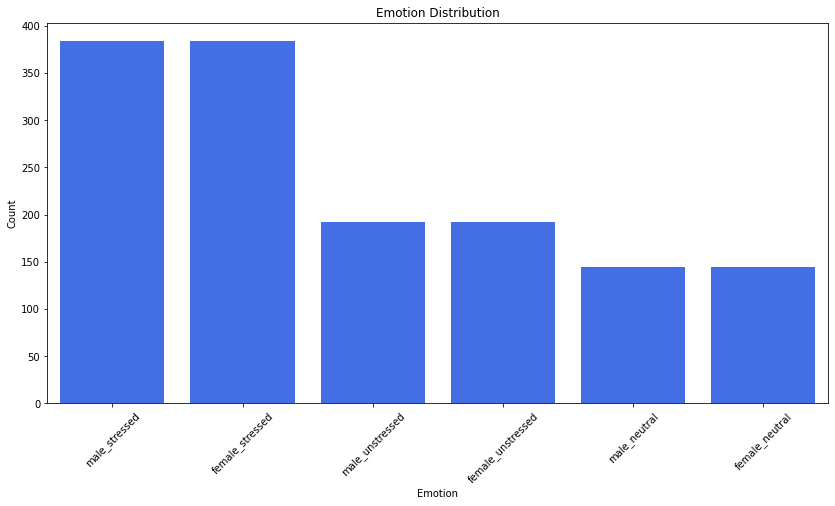

In [ ]:
a = data_df.label.value_counts()
plot_emotion_dist(a, "#2962FF", "Emotion Distribution")

## Data Splitting

In [ ]:
# Male Data Set

data2_df = data_df.copy()
data2_df = data2_df[data2_df.label != "male_none"]
data2_df = data2_df[data2_df.label != "female_none"].reset_index(drop=True)
data2_df = data2_df[data2_df.label != "female_neutral"]
data2_df = data2_df[data2_df.label != "female_unstressed"]
data2_df = data2_df[data2_df.label != "female_stressed"]
data2_df = data2_df[data2_df.label != "female_stressed"]
data2_df = data2_df[data2_df.label != "female_stressed"]
data2_df = data2_df[data2_df.label != "female_neutral"]
data2_df = data2_df[data2_df.label != "female_unstressed"]
data2_df = data2_df[data2_df.label != "female_stressed"].reset_index(drop=True)

tmp1 = data2_df[data2_df.actor == 21]
tmp2 = data2_df[data2_df.actor == 22]
tmp3 = data2_df[data2_df.actor == 23]
tmp4 = data2_df[data2_df.actor == 24]
data3_df = pd.concat([tmp1, tmp3],ignore_index=True).reset_index(drop=True)
data2_df = data2_df[data2_df.actor != 21]
data2_df = data2_df[data2_df.actor != 22]
data2_df = data2_df[data2_df.actor != 23].reset_index(drop=True)
data2_df = data2_df[data2_df.actor != 24].reset_index(drop=True)
print (len(data2_df))
data2_df.head(50)

600


,path,source,actor,gender,intensity,statement,repetition,emotion,label
0,/content/gdrive/MyDrive/Audio_Speech_Actors_01...,1,1,male,1,0,0,3,male_unstressed
1,/content/gdrive/MyDrive/Audio_Speech_Actors_01...,1,1,male,1,0,1,3,male_unstressed
2,/content/gdrive/MyDrive/Audio_Speech_Actors_01...,1,1,male,0,1,1,2,male_neutral
3,/content/gdrive/MyDrive/Audio_Speech_Actors_01...,1,1,male,0,1,1,1,male_neutral
4,/content/gdrive/MyDrive/Audio_Speech_Actors_01...,1,1,male,0,1,1,3,male_unstressed
5,/content/gdrive/MyDrive/Audio_Speech_Actors_01...,1,1,male,0,0,0,2,male_neutral
6,/content/gdrive/MyDrive/Audio_Speech_Actors_01...,1,1,male,1,0,0,2,male_neutral
7,/content/gdrive/MyDrive/Audio_Speech_Actors_01...,1,1,male,1,1,1,2,male_neutral
8,/content/gdrive/MyDrive/Audio_Speech_Actors_01...,1,1,male,0,0,1,2,male_neutral
9,/content/gdrive/MyDrive/Audio_Speech_Actors_01...,1,1,male,0,1,0,2,male_neutral


In [ ]:
print (len(data3_df))
data3_df.head(80)

120


,path,source,actor,gender,intensity,statement,repetition,emotion,label
0,/content/gdrive/MyDrive/Audio_Speech_Actors_01...,1,21,male,0,0,1,2,male_neutral
1,/content/gdrive/MyDrive/Audio_Speech_Actors_01...,1,21,male,0,1,1,1,male_neutral
2,/content/gdrive/MyDrive/Audio_Speech_Actors_01...,1,21,male,0,0,0,2,male_neutral
3,/content/gdrive/MyDrive/Audio_Speech_Actors_01...,1,21,male,1,0,1,3,male_unstressed
4,/content/gdrive/MyDrive/Audio_Speech_Actors_01...,1,21,male,1,1,0,2,male_neutral
...,...,...,...,...,...,...,...,...,...
75,/content/gdrive/MyDrive/Audio_Speech_Actors_01...,1,23,male,1,1,0,2,male_neutral
76,/content/gdrive/MyDrive/Audio_Speech_Actors_01...,1,23,male,0,0,0,6,male_stressed
77,/content/gdrive/MyDrive/Audio_Speech_Actors_01...,1,23,male,0,1,0,2,male_neutral
78,/content/gdrive/MyDrive/Audio_Speech_Actors_01...,1,23,male,1,1,1,3,male_unstressed


## Analysing Features of audio files using librosa

In [ ]:
data = pd.DataFrame(columns=['feature'])
for i in tqdm(range(len(data2_df))):
    X, sample_rate = librosa.load(data2_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
#     X = X[10000:90000]
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs
    data.loc[i] = [feature]

100%|██████████| 600/600 [03:05<00:00,  3.24it/s]


In [ ]:
data.head()

,feature
0,"[-58.731003, -58.746517, -58.048584, -57.37079..."
1,"[-56.73388, -56.752663, -56.415257, -55.71568,..."
2,"[-69.0514, -69.0514, -69.0514, -69.0514, -69.0..."
3,"[-66.05848, -66.05848, -66.05848, -66.05848, -..."
4,"[-65.24335, -65.24335, -65.24335, -65.24335, -..."


In [ ]:
df3 = pd.DataFrame(data['feature'].values.tolist())
labels = data2_df.label

In [ ]:
df3.head()

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
0,-58.731003,-58.746517,-58.048584,-57.370796,-58.199924,-59.706638,-59.876179,-59.998066,-59.936649,-60.248569,...,-60.248394,-60.248569,-60.248569,-60.248569,-60.248569,-60.248569,-60.248569,-60.248569,-60.248569,-60.248569
1,-56.733879,-56.752663,-56.415257,-55.715679,-55.817852,-55.832748,-55.889751,-55.116520,-54.244675,-56.211891,...,-56.756023,-56.756023,-56.756023,-56.756023,-56.756023,-56.756023,-56.756023,-56.756023,-56.756023,-56.756023
2,-69.051399,-69.051399,-69.051399,-69.051399,-69.051399,-68.754860,-69.051399,-69.051399,-69.051399,-68.359085,...,-65.446953,-68.552094,-69.051399,-69.051399,-69.051399,-68.688614,-69.051399,NaN,NaN,NaN
3,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.117577,...,-60.038185,-62.578308,-61.972858,-62.992752,-63.596188,-60.900845,-60.145267,-63.739048,-64.051971,-64.284286


In [ ]:
newdf = pd.concat([df3,labels], axis=1)

In [ ]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})
len(rnewdf)

600

In [ ]:
rnewdf.head(10)

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-58.731003,-58.746517,-58.048584,-57.370796,-58.199924,-59.706638,-59.876179,-59.998066,-59.936649,-60.248569,...,-60.248569,-60.248569,-60.248569,-60.248569,-60.248569,-60.248569,-60.248569,-60.248569,-60.248569,male_unstressed
1,-56.733879,-56.752663,-56.415257,-55.715679,-55.817852,-55.832748,-55.889751,-55.116520,-54.244675,-56.211891,...,-56.756023,-56.756023,-56.756023,-56.756023,-56.756023,-56.756023,-56.756023,-56.756023,-56.756023,male_unstressed
2,-69.051399,-69.051399,-69.051399,-69.051399,-69.051399,-68.754860,-69.051399,-69.051399,-69.051399,-68.359085,...,-68.552094,-69.051399,-69.051399,-69.051399,-68.688614,-69.051399,NaN,NaN,NaN,male_neutral
3,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_neutral
4,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.117577,...,-62.578308,-61.972858,-62.992752,-63.596188,-60.900845,-60.145267,-63.739048,-64.051971,-64.284286,male_unstressed
5,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,...,-70.267769,-69.957710,-68.377602,-69.862564,-70.267769,-70.122139,-68.554955,-70.206528,-70.267769,male_neutral
6,-73.841370,-73.841370,-73.841370,-73.719650,-73.841370,-73.841370,-73.841370,-73.303635,-72.806808,-73.841370,...,-73.841370,-73.841370,-73.841370,-73.841370,-73.841370,-73.841370,-73.841370,-73.841370,-73.841370,male_neutral
7,-70.746513,-70.746513,-70.025284,-69.131271,-70.746513,-70.746513,-70.746513,-70.746513,-70.746513,-70.746513,...,-70.746513,-70.746513,-70.079247,-69.590454,-69.202751,-70.159462,-70.445366,-68.199043,-67.414200,male_neutral
8,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-65.239815,-65.536194,-67.557388,-67.557388,...,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.126572,-67.557388,male_neutral
9,-69.673286,-69.693306,-69.693306,-69.693306,-69.693306,-69.693306,-69.693306,-69.620773,-69.693306,-68.906570,...,-69.693306,-69.693306,-69.693306,-69.693306,-69.383514,-69.693306,-69.693306,-69.693306,-69.693306,male_neutral


In [ ]:
rnewdf.isnull().sum().sum()

4024

In [ ]:
rnewdf = rnewdf.fillna(0)
rnewdf.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-58.731003,-58.746517,-58.048584,-57.370796,-58.199924,-59.706638,-59.876179,-59.998066,-59.936649,-60.248569,...,-60.248569,-60.248569,-60.248569,-60.248569,-60.248569,-60.248569,-60.248569,-60.248569,-60.248569,male_unstressed
1,-56.733879,-56.752663,-56.415257,-55.715679,-55.817852,-55.832748,-55.889751,-55.116520,-54.244675,-56.211891,...,-56.756023,-56.756023,-56.756023,-56.756023,-56.756023,-56.756023,-56.756023,-56.756023,-56.756023,male_unstressed
2,-69.051399,-69.051399,-69.051399,-69.051399,-69.051399,-68.754860,-69.051399,-69.051399,-69.051399,-68.359085,...,-68.552094,-69.051399,-69.051399,-69.051399,-68.688614,-69.051399,0.000000,0.000000,0.000000,male_neutral
3,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,male_neutral
4,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.117577,...,-62.578308,-61.972858,-62.992752,-63.596188,-60.900845,-60.145267,-63.739048,-64.051971,-64.284286,male_unstressed


## Data Making/Processing

In [ ]:
def plot_time_series(data):
    """
    Plot the Audio Frequency.
    """
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()


def noise(data):
    """
    Adding White Noise.
    """
    # you can take any distribution from https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html
    noise_amp = 0.005*np.random.uniform()*np.amax(data)
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data

def shift(data):
    """
    Random Shifting.
    """
    s_range = int(np.random.uniform(low=-5, high = 5)*500)
    return np.roll(data, s_range)

def stretch(data, rate=0.8):
    """
    Streching the Sound.
    """
    data = librosa.effects.time_stretch(data, rate)
    return data

def pitch(data, sample_rate):
    """
    Pitch Tuning.
    """
    bins_per_octave = 12
    pitch_pm = 2
    pitch_change =  pitch_pm * 2*(np.random.uniform())
    data = librosa.effects.pitch_shift(data.astype('float64'),
                                      sample_rate, n_steps=pitch_change,
                                      bins_per_octave=bins_per_octave)
    return data

def dyn_change(data):
    """
    Random Value Change.
    """
    dyn_change = np.random.uniform(low=1.5,high=3)
    return (data * dyn_change)

def speedNpitch(data):
    """
    peed and Pitch Tuning.
    """
    # you can change low and high here
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.0  / length_change
    tmp = np.interp(np.arange(0,len(data),speed_fac),np.arange(0,len(data)),data)
    minlen = min(data.shape[0], tmp.shape[0])
    data *= 0
    data[0:minlen] = tmp[0:minlen]
    return data

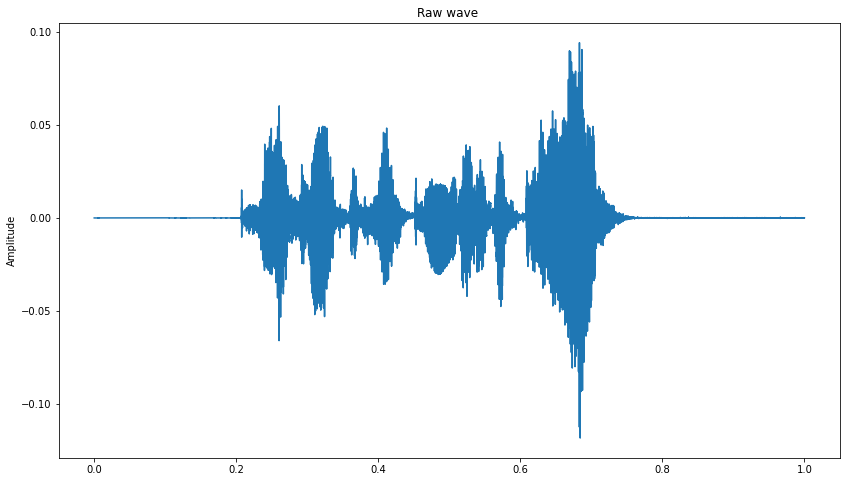

In [ ]:
X, sample_rate = librosa.load(data2_df.path[216], res_type='kaiser_fast',duration=4,sr=22050*2,offset=0.3)
plot_time_series(X)
ipd.Audio(X, rate=sample_rate)

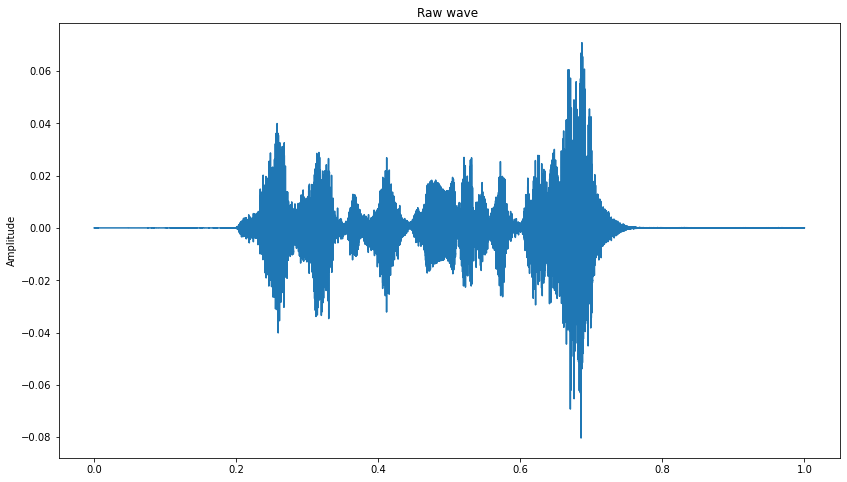

In [ ]:
x = pitch(X, sample_rate)
plot_time_series(x)
ipd.Audio(x, rate=sample_rate)

In [ ]:
# Data Making Method 1

syn_data1 = pd.DataFrame(columns=['feature', 'label'])
for i in tqdm(range(len(data2_df))):
    X, sample_rate = librosa.load(data2_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    if data2_df.label[i]:
#     if data2_df.label[i] == "male_positive":
        X = noise(X)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
        feature = mfccs
        a = random.uniform(0, 1)
        syn_data1.loc[i] = [feature, data2_df.label[i]]

100%|██████████| 600/600 [01:03<00:00,  9.39it/s]


In [ ]:
# Data Making Method 2

syn_data2 = pd.DataFrame(columns=['feature', 'label'])
for i in tqdm(range(len(data2_df))):
    X, sample_rate = librosa.load(data2_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    if data2_df.label[i]:
#     if data2_df.label[i] == "male_positive":
        X = pitch(X, sample_rate)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
        feature = mfccs
        a = random.uniform(0, 1)
        syn_data2.loc[i] = [feature, data2_df.label[i]]

100%|██████████| 600/600 [03:47<00:00,  2.64it/s]


In [ ]:
len(syn_data1), len(syn_data2)

(600, 600)

In [ ]:
syn_data1 = syn_data1.reset_index(drop=True)
syn_data2 = syn_data2.reset_index(drop=True)

In [ ]:
df4 = pd.DataFrame(syn_data1['feature'].values.tolist())
labels4 = syn_data1.label
syndf1 = pd.concat([df4,labels4], axis=1)
syndf1 = syndf1.rename(index=str, columns={"0": "label"})
syndf1 = syndf1.fillna(0)
len(syndf1)

600

In [ ]:
syndf1.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-42.589580,-43.125733,-44.532178,-45.696313,-45.156487,-47.357111,-43.796770,-43.566528,-44.417837,-45.387959,...,-44.121820,-42.969473,-41.702346,-45.620567,-46.358295,-45.787383,-46.685510,-47.519410,-45.503338,male_unstressed
1,-52.791695,-52.455244,-50.826884,-50.846551,-50.548321,-51.266591,-52.309648,-51.895977,-51.421583,-50.005613,...,-52.624052,-53.646962,-52.989942,-53.027369,-53.360734,-52.222648,-51.994847,-52.181027,-53.929580,male_unstressed
2,-51.818498,-50.396789,-51.255021,-50.675917,-50.062714,-50.728857,-51.150495,-50.870088,-49.356671,-48.417556,...,-50.965305,-50.991512,-50.434059,-51.191081,-51.715268,-50.457596,0.000000,0.000000,0.000000,male_neutral
3,-57.957828,-56.732117,-57.032982,-56.335871,-56.408486,-57.364770,-57.614295,-56.810311,-58.625732,-57.274629,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,male_neutral
4,-55.997587,-54.747927,-52.563191,-53.138845,-55.854842,-55.463638,-55.125274,-54.412621,-53.740405,-53.302467,...,-53.125357,-53.006122,-53.209037,-53.649195,-55.983685,-54.953287,-56.233001,-56.257808,-53.732370,male_unstressed


In [ ]:
df4 = pd.DataFrame(syn_data2['feature'].values.tolist())
labels4 = syn_data2.label
syndf2 = pd.concat([df4,labels4], axis=1)
syndf2 = syndf2.rename(index=str, columns={"0": "label"})
syndf2 = syndf2.fillna(0)
len(syndf2)

600

In [ ]:
syndf2.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-58.827483,-59.213876,-59.530959,-59.991540,-61.037090,-60.563793,-60.597213,-61.164209,-61.364070,-61.364070,...,-61.364070,-61.364070,-61.364070,-61.364070,-61.364070,-61.364070,-61.364070,-61.364070,-61.364070,male_unstressed
1,-58.907382,-58.912931,-58.333809,-57.030112,-56.943322,-57.235894,-56.949400,-57.520435,-56.857939,-57.160728,...,-58.929148,-58.929148,-58.929148,-58.929148,-58.929148,-58.929148,-58.929148,-58.929148,-58.929148,male_unstressed
2,-71.420791,-71.420791,-71.420791,-71.420791,-71.420791,-71.311070,-71.420791,-71.420791,-71.420791,-70.970903,...,-70.654076,-71.420791,-71.420791,-71.365149,-71.378523,-71.420791,0.000000,0.000000,0.000000,male_neutral
3,-68.985981,-69.188607,-69.188607,-69.188607,-69.188607,-69.188607,-69.188607,-69.188607,-69.188607,-69.188607,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,male_neutral
4,-70.186214,-70.186214,-70.186214,-70.186214,-70.186214,-70.186214,-70.186214,-70.186214,-70.186214,-70.186214,...,-65.618784,-67.395382,-66.946389,-66.296272,-65.116655,-65.004347,-67.623930,-68.446203,-68.732332,male_unstressed


In [ ]:
# Combining the Proccessed data with original
combined_df = pd.concat([rnewdf, syndf1, syndf2], ignore_index=True)
combined_df = combined_df.fillna(0)
combined_df.head()


,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-58.731003,-58.746517,-58.048584,-57.370796,-58.199924,-59.706638,-59.876179,-59.998066,-59.936649,-60.248569,...,-60.248569,-60.248569,-60.248569,-60.248569,-60.248569,-60.248569,-60.248569,-60.248569,-60.248569,male_unstressed
1,-56.733879,-56.752663,-56.415257,-55.715679,-55.817852,-55.832748,-55.889751,-55.116520,-54.244675,-56.211891,...,-56.756023,-56.756023,-56.756023,-56.756023,-56.756023,-56.756023,-56.756023,-56.756023,-56.756023,male_unstressed
2,-69.051399,-69.051399,-69.051399,-69.051399,-69.051399,-68.754860,-69.051399,-69.051399,-69.051399,-68.359085,...,-68.552094,-69.051399,-69.051399,-69.051399,-68.688614,-69.051399,0.000000,0.000000,0.000000,male_neutral
3,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,male_neutral
4,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.117577,...,-62.578308,-61.972858,-62.992752,-63.596188,-60.900845,-60.145267,-63.739048,-64.051971,-64.284286,male_unstressed


In [ ]:
#  Stratified Shuffle Split
from sklearn.model_selection import StratifiedShuffleSplit
X = combined_df.drop(['label'], axis=1)
y = combined_df.label
xxx = StratifiedShuffleSplit(1, test_size=0.2, random_state=12)
for train_index, test_index in xxx.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
y_train.value_counts()

male_stressed      768
male_unstressed    384
male_neutral       288
Name: label, dtype: int64

In [ ]:
y_test.value_counts()

male_stressed      192
male_unstressed     96
male_neutral        72
Name: label, dtype: int64

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
y_train

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
X_train

array([[-42.48655736, -38.60291417, -39.16474219, ..., -39.68074032,
        -41.75891548, -40.87759746],
       [-53.80082321, -51.70479202, -52.44017029, ...,   0.        ,
          0.        ,   0.        ],
       [-45.25280598, -46.05438367, -47.11550671, ..., -41.67681833,
        -43.0145203 , -42.38393746],
       ...,
       [-56.8610878 , -56.8610878 , -56.8610878 , ..., -49.22476959,
        -49.71222305, -50.44376373],
       [-46.93008791, -45.65720151, -45.26815588, ...,   0.        ,
          0.        ,   0.        ],
       [-50.11723684, -51.54442477, -53.9414394 , ...,   0.        ,
          0.        ,   0.        ]])

In [ ]:
X_train.shape

(1440, 259)

## Creating the CNN Model

In [ ]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [ ]:
# Set up Keras util functions

from keras import backend as K

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def fscore(y_true, y_pred):
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    f_score = 2 * (p * r) / (p + r + K.epsilon())
    return f_score

def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr

In [ ]:
# New model
model = Sequential()
model.add(Conv1D(256, 8, padding='valid',input_shape=(X_train.shape[1],1)))
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(3))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 252, 256)          2304      
                                                                 
 activation (Activation)     (None, 252, 256)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 252, 256)          524544    
                                                                 
 batch_normalization (BatchN  (None, 252, 256)         1024      
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 252, 256)          0         
                                                                 
 dropout (Dropout)           (None, 252, 256)          0         
                                                        

In [ ]:
# Compile your model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Model Training
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)
mcp_save = ModelCheckpoint('E:\\8th sem\\Final_Year_Project_Files\\New Folder\\Data_noiseNshift.h5', save_best_only=True, monitor='val_loss', mode='min')

print(x_traincnn.shape)
print(x_testcnn.shape)

cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=100,
                     validation_data=(x_testcnn, y_test), callbacks=[mcp_save, lr_reduce])

(1440, 259, 1)
(360, 259, 1)
Epoch 1/100
90/90 [==============================] - 51s 544ms/step - loss: 0.9867 - accuracy: 0.5250 - val_loss: 1.0555 - val_accuracy: 0.4944 - lr: 0.0010
Epoch 2/100
90/90 [==============================] - 35s 395ms/step - loss: 0.9509 - accuracy: 0.5347 - val_loss: 1.0038 - val_accuracy: 0.5361 - lr: 0.0010
Epoch 3/100
90/90 [==============================] - 36s 395ms/step - loss: 0.9346 - accuracy: 0.5444 - val_loss: 0.9885 - val_accuracy: 0.5333 - lr: 0.0010
Epoch 4/100
90/90 [==============================] - 36s 404ms/step - loss: 0.9289 - accuracy: 0.5500 - val_loss: 1.0251 - val_accuracy: 0.5083 - lr: 0.0010
Epoch 5/100
90/90 [==============================] - 37s 413ms/step - loss: 0.9130 - accuracy: 0.5660 - val_loss: 1.3724 - val_accuracy: 0.5333 - lr: 0.0010
Epoch 6/100
90/90 [==============================] - 35s 391ms/step - loss: 0.9114 - accuracy: 0.5688 - val_loss: 1.0662 - val_accuracy: 0.5111 - lr: 0.0010
Epoch 7/100
90/90 [==========

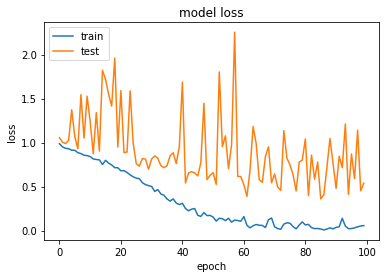

In [ ]:
# Plotting the Train Valid Loss Graph
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Saving the model.json

import json
model_json = model.to_json()
with open("E:\\8th sem\\Final_Year_Project_Files\\New Folder\\model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
import tensorflow as tf
from tensorflow.keras.initializers import glorot_uniform
loaded_model = tf.keras.models.load_model("E:\\8th sem\\Final_Year_Project_Files\\New Folder\\Data_noiseNshift.h5",custom_objects={'GlorotUniform': glorot_uniform()})
print("Loaded model from disk")
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 88.33%


## Predicting stress on the test data

In [ ]:
len(data2_df)

600

In [ ]:
data_test = pd.DataFrame(columns=['feature'])
for i in tqdm(range(len(data2_df))):
    X, sample_rate = librosa.load(data2_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs
    data_test.loc[i] = [feature]

test_valid = pd.DataFrame(data_test['feature'].values.tolist())
test_valid = np.array(test_valid)
test_valid_lb = np.array(data2_df.label)
lb = LabelEncoder()
test_valid_lb = np_utils.to_categorical(lb.fit_transform(test_valid_lb))
test_valid = np.expand_dims(test_valid, axis=2)

100%|██████████| 600/600 [00:54<00:00, 11.01it/s]


In [ ]:
preds = loaded_model.predict(test_valid,
                         batch_size=16,
                         verbose=1)

38/38 [==============================] - 3s 85ms/step


In [ ]:
preds

array([[2.4835310e-07, 3.8267513e-05, 9.9996150e-01],
       [2.2720504e-07, 3.7213822e-06, 9.9999607e-01],
       [9.8952752e-01, 1.0388966e-02, 8.3501895e-05],
       ...,
       [2.2608181e-11, 9.9999940e-01, 6.3763383e-07],
       [          nan,           nan,           nan],
       [1.0028484e-10, 9.9999988e-01, 6.6748171e-08]], dtype=float32)

In [ ]:
preds1=preds.argmax(axis=1)

In [ ]:
preds1

array([2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 2, 1, 0, 0, 2, 0, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 2,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 2, 2,
       0, 1, 0, 0, 2, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 2, 1, 1, 2,
       2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 0, 1, 2, 2, 0, 0, 0, 1, 0, 0,
       2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 1, 2, 2, 0, 2,
       0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1, 0, 1, 1, 1,
       0, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,

In [ ]:
abc = preds1.astype(int).flatten()

In [ ]:
print(abc)

[2 2 0 0 2 0 0 0 0 0 2 1 0 0 1 2 1 0 0 2 0 2 2 1 1 2 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 2 2 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0
 2 1 1 1 1 1 1 1 1 1 0 2 2 1 1 1 1 1 2 1 1 1 1 2 1 0 1 1 0 1 2 1 1 1 1 1 1
 1 2 0 2 0 0 2 0 0 2 0 1 0 0 1 0 0 1 1 0 2 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 2 1 2 2 0 1 0 0 2 0 1 1 1 0 1 1 2 1 1 0 0 1 2 1 1 2 2 0 2 0 1 0 0 1 1
 2 0 1 0 1 2 2 0 0 0 1 0 0 2 1 1 0 0 1 1 0 2 1 0 0 1 1 1 2 0 1 2 1 2 2 1 1
 1 2 1 1 1 1 1 1 2 1 1 0 1 2 1 1 2 2 0 2 0 2 0 0 0 1 2 2 0 0 0 0 0 0 0 0 0
 2 2 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 2 1 0 1 1 1 0 2 2 1 0 1 1 0 1 1
 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 2 0 1 1 0 1 1 0 1 0 1 1 1 0
 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 2 0 1 0 0 0 1 0 0 1 1 0 0 2 1 1 0 0 0 1
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 2 1 0 0 1 0 1
 1 1 0 0 1 0 0 1 0 2 1 0 0 0 2 1 0 0 2 0 0 0 0 0 1 1 1 1 0 2 1 0 0 0 2 2 0
 0 1 2 2 1 2 2 1 0 1 0 1 

In [ ]:
predictions = (lb.inverse_transform((abc)))

In [ ]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,male_unstressed
1,male_unstressed
2,male_neutral
3,male_neutral
4,male_unstressed
5,male_neutral
6,male_neutral
7,male_neutral
8,male_neutral
9,male_neutral


In [ ]:
actual=test_valid_lb.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [ ]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,male_unstressed
1,male_unstressed
2,male_neutral
3,male_neutral
4,male_unstressed
5,male_neutral
6,male_neutral
7,male_neutral
8,male_neutral
9,male_neutral


In [ ]:
finaldf = actualdf.join(preddf)

## Actual vs Predicted Values

In [ ]:
finaldf[40:60]

,actualvalues,predictedvalues
40,male_stressed,male_stressed
41,male_stressed,male_stressed
42,male_unstressed,male_neutral
43,male_stressed,male_stressed
44,male_stressed,male_stressed
45,male_stressed,male_stressed
46,male_stressed,male_stressed
47,male_unstressed,male_neutral
48,male_stressed,male_stressed
49,male_unstressed,male_neutral


In [ ]:
finaldf.groupby('actualvalues').count()


,predictedvalues
actualvalues,
male_neutral,120
male_stressed,320
male_unstressed,160


In [ ]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
male_neutral,262
male_stressed,244
male_unstressed,94


In [ ]:
finaldf.to_csv('E:\\8th sem\\Final_Year_Project_Files\\New Folder\\Predictions.csv', index=False)

In [ ]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import accuracy_score
y_true = finaldf.actualvalues
y_pred = finaldf.predictedvalues
accuracy_score(y_true, y_pred)*100

76.0

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average='macro') *100

74.07526145118014

In [ ]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_true, y_pred)
c

array([[120,   0,   0],
       [ 76, 243,   1],
       [ 66,   1,  93]])